In [1]:
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:

server_url = "http://127.0.0.1:8001"  # Server endpoint
response = requests.get(f"{server_url}/get-global-parameters")
print(response.json())
global_model=response.json()
coef = np.array(global_model['coef']).flatten()  # Use flatten to convert 2D array to 1D if needed
intercept = global_model['intercept_']

node_file = "./Datasets/node8.csv"
data = pd.read_csv(node_file)

# Extract features (all columns except the 9th one)
local_dataset = data.drop(columns=data.columns[9]).values  # Drop the 9th column for features

# Extract labels (9th column)
y_test = data.iloc[:, 9].values  # Select the 9th column for labels

FLregressor = LinearRegression()

FLregressor.coef_ = coef.copy()
FLregressor.intercept_ = intercept

{'coef': [[0.0031970984775524037, -0.0031970984775524375, -0.0029667534192965323, -0.0012019573229363366, -0.008589876947528767, 0.005392778469976326, -0.004798743194989458, 0.01587529565672486, -0.0037107432419498996, 0.17924621104631971, -0.020575300645324788, 0.7701242841799725, 0.11563051783398322, 0.03242184621363428, -0.0025545558628034706, 0.04424681537409152]], 'intercept_': -0.029869155274974815, 'time': '2025-04-06 11:12:45.199'}


In [3]:
y_pred= FLregressor.predict(local_dataset)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2) #With FL

0.986933058577772


In [4]:
output_withFL=np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1)

In [5]:
df=pd.DataFrame(output_withFL)
df.to_csv("output_withFL.csv", index=False, header=True)

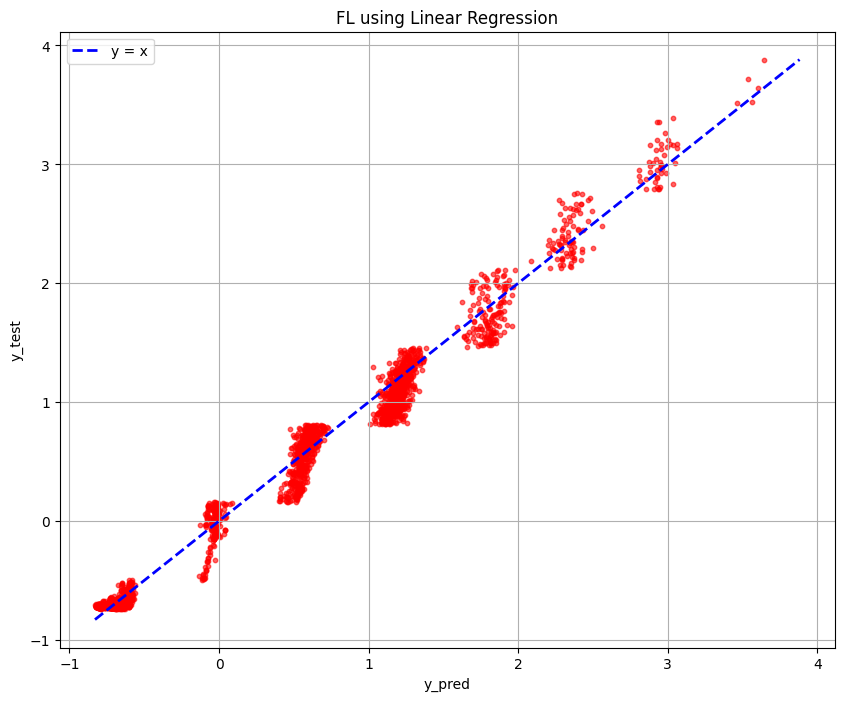

In [6]:
# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(y_pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("FL using Linear Regression")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()

# Without FL

In [7]:
regressor_WithoutFL=LinearRegression()
train_set = "./Datasets/scaled_Steel_industry_data.csv"
train_data=pd.read_csv(train_set)


train_dataset_withoutFL= train_data.drop(columns=train_data.columns[9]).values  # Drop the 9th column for features
y_train_withoutFL = train_data.iloc[:, 9].values  # Select the 9th column for labels

regressor_WithoutFL.fit(train_dataset_withoutFL, y_train_withoutFL)




LinearRegression()

In [8]:
node_file = "./Datasets/node8.csv"
data = pd.read_csv(node_file)

# Extract features (all columns except the 9th one)
local_dataset_withoutFL = data.drop(columns=data.columns[9]).values  # Drop the 9th column for features

# Extract labels (9th column)
y_test_withoutFL = data.iloc[:, 9].values  # Select the 9th column for labels

In [9]:
y_pred_withoutFL= regressor_WithoutFL.predict(local_dataset_withoutFL)

In [17]:
output_withoutFL=np.concatenate((y_pred_withoutFL.reshape(-1,1),y_test_withoutFL.reshape(-1,1)),1)


In [ ]:
df=pd.DataFrame(output_withoutFL)
df.to_csv("output_withoutFL.csv", index=False, header=True)

In [12]:
r2_withoutFL = r2_score(y_test_withoutFL, y_pred_withoutFL)
print(r2_withoutFL) #Without FL

0.9881609128344184


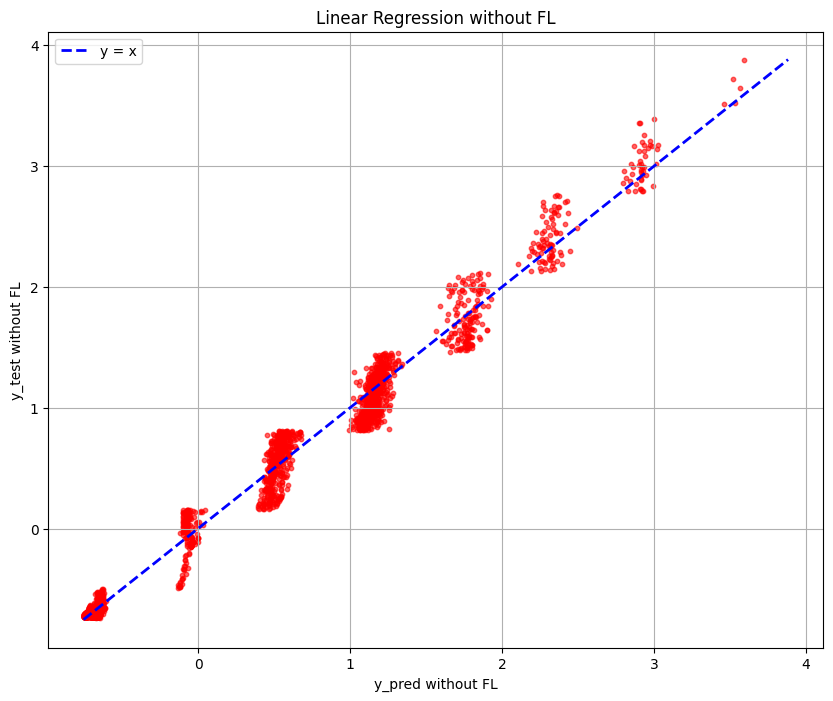

In [13]:
# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(y_pred_withoutFL, y_test_withoutFL, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(y_pred_withoutFL), min(y_test_withoutFL))
max_val = max(max(y_pred_withoutFL), max(y_test_withoutFL))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("Linear Regression without FL")
plt.xlabel('y_pred without FL')
plt.ylabel('y_test without FL')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()

In [14]:
print("r2 score with FL is : " + str(r2))
print("r2 score without FL is : " + str(r2_withoutFL))

r2 score with FL is : 0.986933058577772
r2 score without FL is : 0.9881609128344184
